## TEST.PREDICTIONS BMW SALES xd

notas xd
-creo que el roc se debe manejar con un parametro clasificador 'REVISAR'


## LIBRERIAS

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve, roc_curve, auc, balanced_accuracy_score
from sklearn.metrics import precision_recall_curve, classification_report
print("Directorio actual:", os.getcwd())

Directorio actual: /workspaces/Ciencia-de-Datos---BMW-Modelo-predictivo-ventas-2025-en-adelante./NOTEBOOKS


## Cargar la Base de Datos

## Original

In [ ]:
df_origi = pd.read_csv('../data/raw/BMW sales data (2010-2024).csv')
df_origi

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [ ]:
df_origi[["Price_USD" ]].isnull().sum()

Price_USD    0
dtype: int64

## TEST

In [ ]:
# Cargar la base de datos procesada
df_test = pd.read_csv('../data/test_predictions.csv')
df_test


,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Real_Class,Predicted_Class,Probability_High
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,1,0,0.453162
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,0,0,0.426196
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,0,0,0.279677
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,0,0,0.168475
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,0,0,0.438886
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,1,1,0.734817
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,1,0,0.453373
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,1,1,0.580544
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,1,0,0.328105


In [ ]:
# Definir variables
y = df_test["Real_Class"].map({"Low": 0, "High": 1})
y_pred = df_test["Predicted_Class"]
y_proba = df_test["Probability_High"]


## Matriz de Confusion

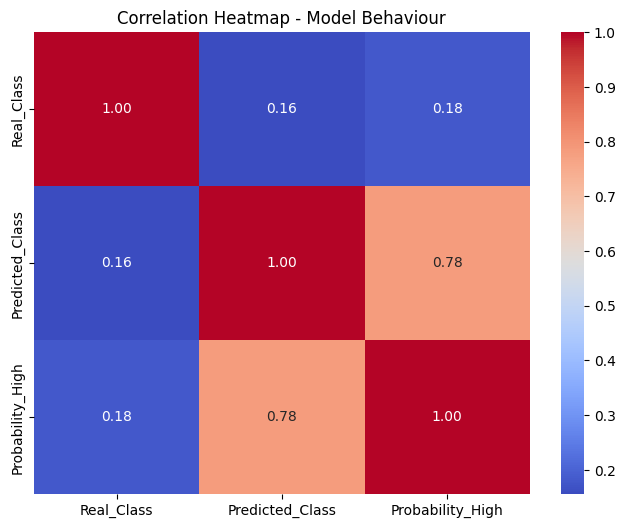

In [ ]:
# Seleccionar solo las columnas relacionadas con el modelo
model_cols = df_test[['Real_Class', 'Predicted_Class', 'Probability_High']]

# Calcular matriz de correlación
corr_model = model_cols.corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr_model, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Model Behaviour')
plt.show()

conclusion

## REAL VS PREDICCION


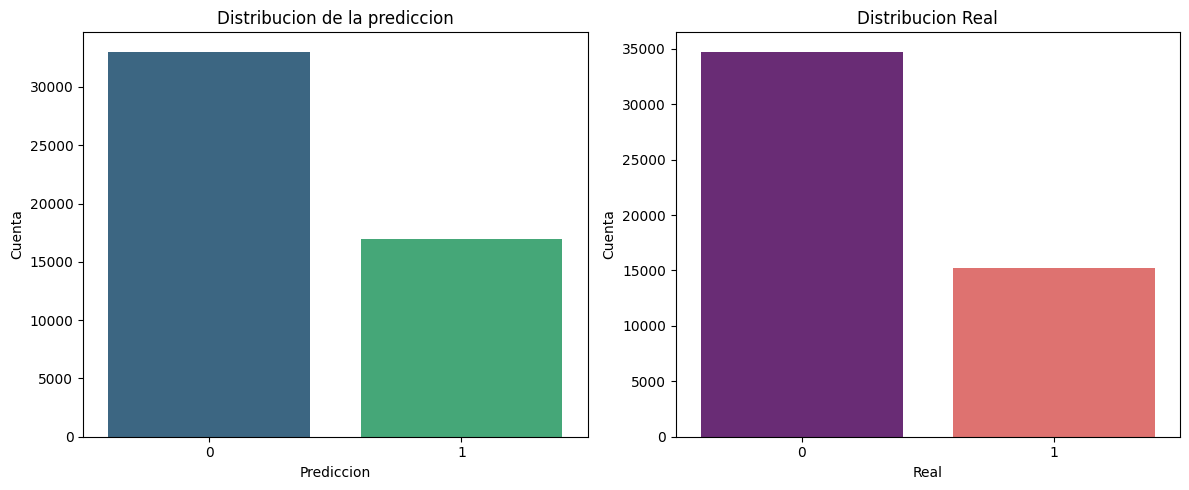

In [ ]:
predicted_counts = df_test['Predicted_Class'].value_counts().sort_index()
real_counts = df_test['Real_Class'].value_counts().sort_index()
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Prediccion
sns.barplot(x=predicted_counts.index, y=predicted_counts.values, ax=axes[0], palette='viridis', hue=predicted_counts.index, legend=False)
axes[0].set_title('Distribucion de la prediccion')
axes[0].set_xlabel('Prediccion')
axes[0].set_ylabel('Cuenta')
axes[0].ticklabel_format(style='plain', axis='y')

# Real
sns.barplot(x=real_counts.index, y=real_counts.values, ax=axes[1], palette='magma', hue=real_counts.index, legend=False)
axes[1].set_title('Distribucion Real')
axes[1].set_xlabel('Real')
axes[1].set_ylabel('Cuenta')
axes[1].ticklabel_format(style='plain', axis='y') 

plt.tight_layout()
plt.show()

conclusion

## % de Error 


TN (True Negative - Verdadero Negativo): El modelo predijo correctamente la clase negativa. Por ejemplo, si el modelo predijo que un coche no era de lujo, y en realidad no lo era.

FP (False Positive - Falso Positivo): El modelo predijo incorrectamente la clase positiva. Esto también se conoce como error de 'Tipo I'. Por ejemplo, si el modelo predijo que un coche era de lujo, pero en realidad no lo era. (Falsamente predicho como positivo).

FN (False Negative - Falso Negativo): El modelo predijo incorrectamente la clase negativa. Esto también se conoce como error de 'Tipo II'. Por ejemplo, si el modelo predijo que un coche no era de lujo, pero en realidad sí lo era. (Falsamente predicho como negativo).

TP (True Positive - Verdadero Positivo): El modelo predijo correctamente la clase positiva. Por ejemplo, si el modelo predijo que un coche era de lujo, y en realidad sí lo era.

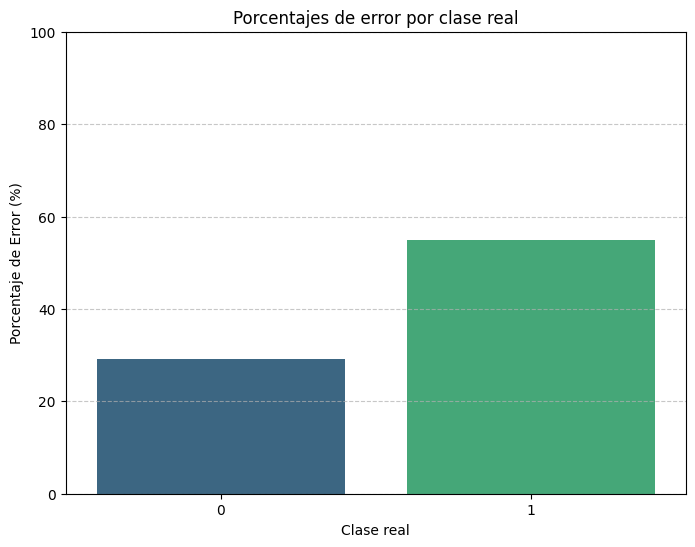

In [ ]:
# Calculate the confusion matrix (assuming bmw['Real_Class'] and bmw['Predicted_Class'] are available)
cm = confusion_matrix(df_test['Real_Class'], df_test['Predicted_Class'])

# Extract values from confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate total instances for each real class
total_real_class_0 = TN + FP
total_real_class_1 = FN + TP

# Calculate percentage of errors for each real class
# Errors for Real_Class 0 are False Positives (FP)
percentage_error_class_0 = (FP / total_real_class_0) * 100 if total_real_class_0 > 0 else 0
# Errors for Real_Class 1 are False Negatives (FN)
percentage_error_class_1 = (FN / total_real_class_1) * 100 if total_real_class_1 > 0 else 0

# Create a DataFrame for plotting
error_percentages = pd.DataFrame({
    'Real Class': [0, 1],
    'Percentage of Errors': [percentage_error_class_0, percentage_error_class_1]
})

# Plotting the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Real Class', y='Percentage of Errors', data=error_percentages, palette='viridis', hue='Real Class', legend=False)
plt.title('Porcentajes de error por clase real')
plt.xlabel('Clase real')
plt.ylabel('Porcentaje de Error (%)')
plt.ylim(0, 100) # Ensure y-axis goes from 0 to 100%
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

conclusion

## CURVA ROC Y AUC

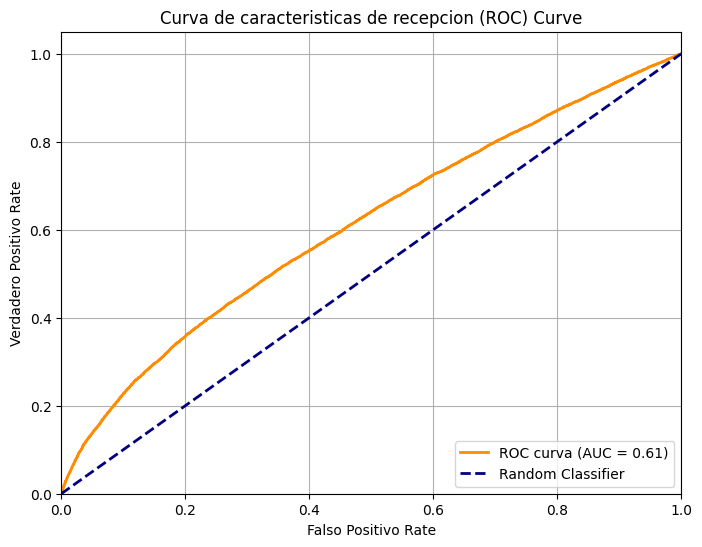

In [ ]:
# Assuming 'Real_Class' are the true labels and 'Probability_High' are the predicted probabilities for the positive class
true_labels = df_test['Real_Class']
predicted_probabilities = df_test['Probability_High']

# Calculate the True Positive Rate (TPR) and False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(true_labels, predicted_probabilities)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curva (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo Rate')
plt.ylabel('Verdadero Positivo Rate')
plt.title('Curva de caracteristicas de recepcion (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

concluir algo no se

## ESTA LA VDD AUN NO SE PARA QUE SIRVE (PR - AUC) CON F1, 👉 ¿Qué mide?

El PR-AUC mide qué tan bien el modelo identifica la clase positiva cuando las clases están desbalanceadas.

Es útil cuando:

Hay mucha diferencia entre Low y High hacer conclusion en base a eso

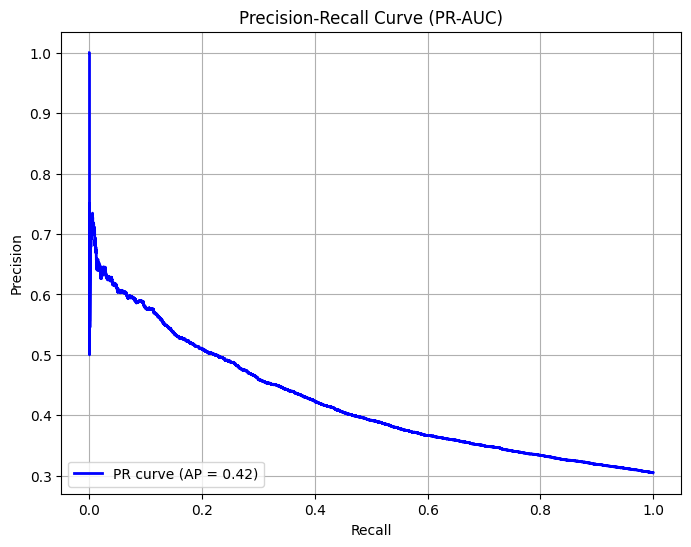

Average Precision (PR-AUC): 0.42
Balanced Accuracy: 0.58


In [ ]:
# Assuming 'Real_Class' are the true labels
true_labels = df_test['Real_Class']

# For ROC-AUC and PR-AUC, we need predicted probabilities for the positive class
predicted_probabilities = df_test['Probability_High']

# For Balanced Accuracy, we need predicted classes
predicted_classes = df_test['Predicted_Class']

# --- 1. PR-AUC (Average Precision) ---
precision, recall, _ = precision_recall_curve(true_labels, predicted_probabilities)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label=f'PR curve (AP = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (PR-AUC)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

print(f"Average Precision (PR-AUC): {pr_auc:.2f}")

# --- 3. Balanced Accuracy ---
balanced_acc = balanced_accuracy_score(true_labels, predicted_classes)
print(f"Balanced Accuracy: {balanced_acc:.2f}")

In [ ]:

# Assuming 'Real_Class' are the true labels and 'Probability_High' are the predicted probabilities for the positive class
true_labels = df_test['Real_Class']
predicted_probabilities = df_test['Probability_High']

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, predicted_probabilities)

# Calculate F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)

# Find the threshold that maximizes the F1-score
# We use np.nan_to_num to handle potential division by zero (where precision + recall is 0)
optimal_idx = np.argmax(np.nan_to_num(f1_scores))
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (based on F1-score maximization): {optimal_threshold:.4f}")

# Apply the optimal threshold to get the predicted classes
optimal_predicted_classes = (predicted_probabilities >= optimal_threshold).astype(int)

# Generate and print the classification report
print("\nClassification Report at Optimal F1-score Threshold:")
print(classification_report(true_labels, optimal_predicted_classes))

Optimal Threshold (based on F1-score maximization): 0.2900

Classification Report at Optimal F1-score Threshold:
              precision    recall  f1-score   support

           0       0.78      0.19      0.30     34754
           1       0.32      0.88      0.47     15246

    accuracy                           0.40     50000
   macro avg       0.55      0.53      0.39     50000
weighted avg       0.64      0.40      0.36     50000



## Analisis por umbral

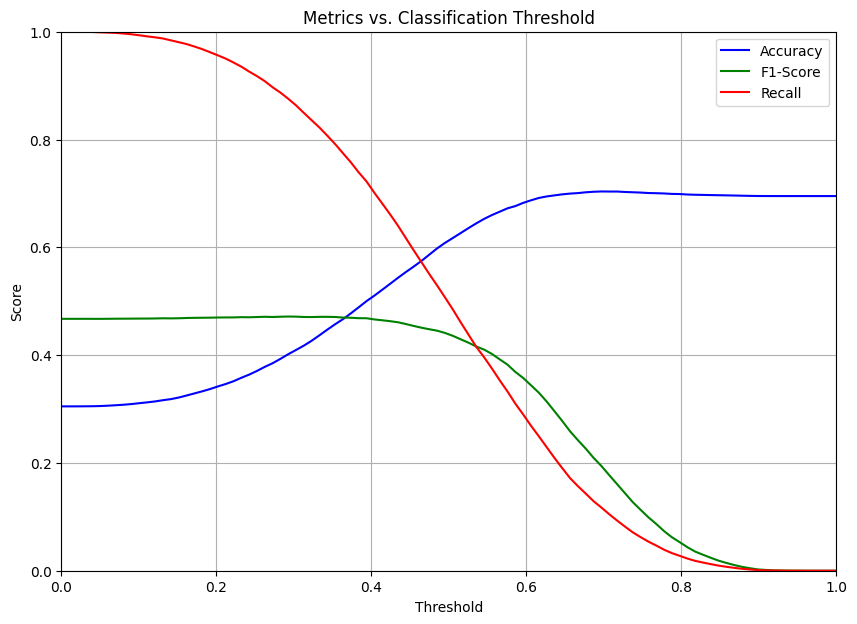

In [ ]:
# Assuming 'Real_Class' are the true labels and 'Probability_High' are the predicted probabilities for the positive class
true_labels = df_test['Real_Class']
predicted_probabilities = df_test['Probability_High']

# Generate a range of thresholds
thresholds = np.linspace(0, 1, 100) # 100 points between 0 and 1

# Lists to store metric values
accuracies = []
f1_scores_list = []
recalls = []

for threshold in thresholds:
    # Convert probabilities to binary predictions based on the current threshold
    predicted_classes = (predicted_probabilities >= threshold).astype(int)

    # Calculate metrics
    accuracies.append(accuracy_score(true_labels, predicted_classes))
    f1_scores_list.append(f1_score(true_labels, predicted_classes, zero_division=0))
    recalls.append(recall_score(true_labels, predicted_classes, zero_division=0))

# Plotting the metrics
plt.figure(figsize=(10, 7))
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.plot(thresholds, f1_scores_list, label='F1-Score', color='green')
plt.plot(thresholds, recalls, label='Recall', color='red')

plt.title('Metrics vs. Classification Threshold')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.show()